# Lab2 - Concrete compressive strength regression (35 marks total)
Author: Christopher DiMattia

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 0. Function definitions (2 marks)

To find the best model, we follow the published article where root-mean squared error (rms) was used as a score function. The rms score function needs to be minimized, because the optimal score is 0, larger values are worse performances

In scikit-learn, only *maximization* is implemented. Hence, it is customary to maximize the *negative* rms. scitkit-learn provides a scoring function `neg_root_mean_squared_error`

In [2]:
from sklearn.model_selection import cross_validate


def get_regressor_neg_rms(model, X, y, cv=7):
    '''Calculate train and validation score for regressor (model) using cross-validation
        
        score is negative root mean-squared error (rms)
        
        model (sklearn classifier): Regressor to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        
        returns: mean training negative rms, mean validation negative rms
    
    '''   
    
    #TODO: add function body here
    scores = cross_validate(model, X, y, cv=cv,return_train_score=True,scoring='neg_root_mean_squared_error')
   

    return (scores['train_score'].mean(), scores['test_score'].mean())

## 1. Load data (1 mark each for 3 total marks)
yellowbrick concrete  
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Load the Dataset object with `load_concrete()` using `return_dataset=True`

Print the README of the Dataset object


In [3]:
#TODO: load the yellowbrick concrete Dataset object and access the README
from yellowbrick.datasets.loaders import load_concrete

In [4]:
#load set and look at column of y to get name
X, y = load_concrete()
display(y)

0       79.986111
1       61.887366
2       40.269535
3       41.052780
4       44.296075
          ...    
1025    44.284354
1026    31.178794
1027    23.696601
1028    32.768036
1029    32.401235
Name: strength, Length: 1030, dtype: float64

### *Question 1:* What is the target variable name and units in this dataset?

The target variable name is strength or Cncrete compressive strength and it's unit is MPa (megapascals).

### 1.1 Prepare the feature matrix and target vector
Load the concrete data set into feature matrix `X` and target vector `y`

Print dimensions and type of `X`, `y`

In [5]:
#TODO: Load feature matrix X and target vector y, print shapes
#same code from lab 1
X, y = load_concrete()

print("X size: " + str(X.size))
print("y size: " + str(y.size))
print("X dimensions: " + str(X.shape))
print("y dimensions: " + str(y.shape))
print("X types:\n" + str(X.dtypes))
print("Y type:" + str(y.dtypes))

X size: 8240
y size: 1030
X dimensions: (1030, 8)
y dimensions: (1030,)
X types:
cement    float64
slag      float64
ash       float64
water     float64
splast    float64
coarse    float64
fine      float64
age         int64
dtype: object
Y type:float64


## 2. Inspect the data (1 mark each for 4 total marks)

### 2.1 Range of each feature
To get an idea if the features are on the same scale, we inspect the range of features

Print the minimum and maximum of each feature in `X`

In [6]:
#look at X values to make sure dataframe loads correctly and use to ensure min/max answers are reasonable
display(X)

,cement,slag,ash,water,splast,coarse,fine,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [7]:
# TODO: print range (minimum and maximum) of features

print("feature minimum values:")
print(X.min())

print("\nfeature minimum values:")
print(X.max())

feature minimum values:
cement    102.00
slag        0.00
ash         0.00
water     121.75
splast      0.00
coarse    801.00
fine      594.00
age         1.00
dtype: float64

feature minimum values:
cement     540.0
slag       359.4
ash        200.1
water      247.0
splast      32.2
coarse    1145.0
fine       992.6
age        365.0
dtype: float64


### 2.2 Boxplot of features 
Using seaborn boxplot, plot all features. This provides a visual view of feature ranges

Add y-axis label indicating units, and a title

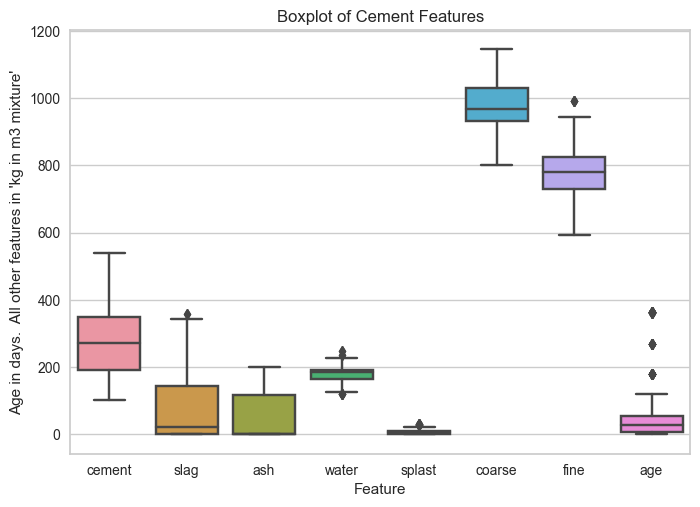

In [8]:
#TODO: add boxplot of features
sns.boxplot(data=X)

plt.title("Boxplot of Cement Features")
plt.ylabel("Age in days.  All other features in 'kg in m3 mixture'")
plt.xlabel("Feature")
plt.show()

### 2.3 Correlation heatmap of features 

To understand if pairs of features are potentially related, contain similar information, pair-wise cross-correlation can be calculated. Models benefit most from un-correlated features.

Using pandas `corr()` method, create the cross-correlations between all features. Plot this cross-correlation object using seaborn `heatmap()` with parameters `vmin=-1, vmax=1, annot=True, cmap='BrBG'`. Add a title.

Pandas `corr()` calculates [Pearson correlation ](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) :
>  It has a value between +1 and −1. A value of +1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.

In [9]:
# TODO: add pairwise cross-correlation heatmap of features
X.corr()

,cement,slag,ash,water,splast,coarse,fine,age
cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947
slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246
ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370
water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604
splast,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717
coarse,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016
fine,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094
age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000


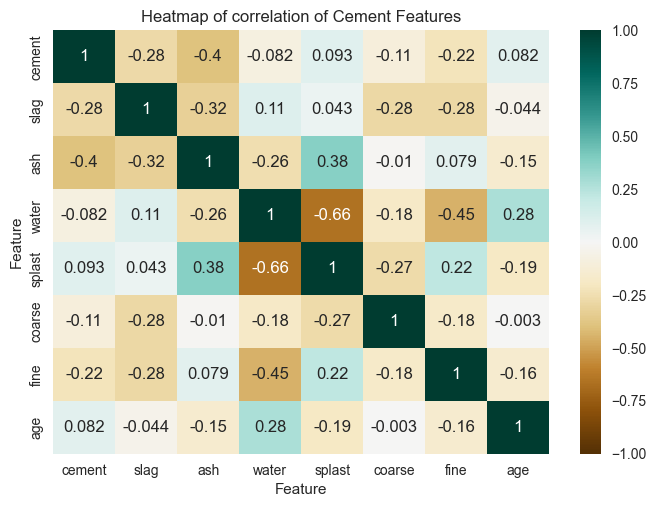

In [10]:
sns.heatmap(data=X.corr(), vmin=-1, vmax=1, annot=True,cmap="BrBG")

plt.title("Heatmap of correlation of Cement Features")
plt.ylabel("Feature")
plt.xlabel("Feature")
plt.show()

### 2.4 Histogram of target variable 

To understand if all target values are equally represented in the data, we analyze how many samples of each target value we have available. The histogram of the target vector can visualize this distribution.

Using seaborn `displot()`, plot the histogram of the target vector. Add a title.

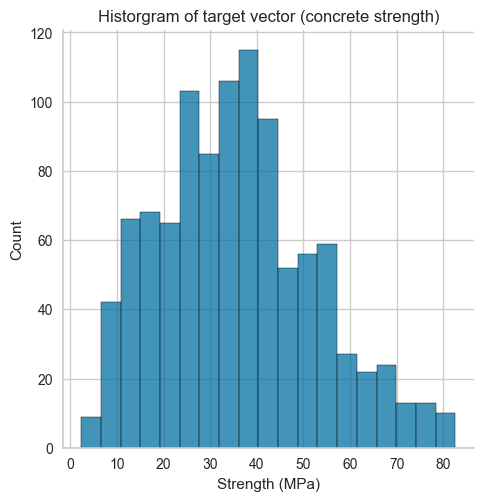

In [11]:
#TODO: Add histogram of targect vector
sns.displot(data=y)

plt.title("Historgram of target vector (concrete strength)")
plt.ylabel("Count")
plt.xlabel("Strength (MPa)")
plt.show()


## 3. Create training and test sets (1 mark)

Using scikit-learn `train_test_split()` with parameters `random_state=37`, `test_size=0.2`, split `X` and `y` into training and test sets

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# TODO: train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=37, test_size=0.2)

## 4. Compare models using cross-validation (3 marks)

Create a list containing a `LinearRegression()`, `RandomForestRegressor(random_state=64)` and `GradientBoostingRegressor(random_state=79)` objects.

Iterate this list and:
- using `X_train` and `y_train`
- compute the negative root mean-squared error using the `get_regressor_neg_rms()` function
- and print the training and validation scores with **2 decimal places**
- Use 7-fold cross-validation

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [15]:
#TODO: Calling get_regressor_neg_rms() for each model
model_dict = {"Linear Regression":LinearRegression(),"Random Forest Regressor":RandomForestRegressor(random_state=64),"Gradient Boosting Regressor":GradientBoostingRegressor(random_state=79)}

for k,v in model_dict.items():
    print(k + "  mean training negative rms: " + '{:.2f}'.format(get_regressor_neg_rms(v, X_train, y_train, cv=7)[0]))
    print(k + "  mean validation negative rms: {:.2f}".format(get_regressor_neg_rms(v, X_train, y_train, cv=7)[1]))

Linear Regression  mean training negative rms: -10.29
Linear Regression  mean validation negative rms: -10.39
Random Forest Regressor  mean training negative rms: -2.12
Random Forest Regressor  mean validation negative rms: -4.97
Gradient Boosting Regressor  mean training negative rms: -3.69
Gradient Boosting Regressor  mean validation negative rms: -4.98


### *Question 2:* For each of the three models, state if models are potentially over- or underfitting and why (3 marks)

Linear Regression - The linear regression model is likely underfitting due to the poor rms for both the training and validation sets

Random Forest - It is likely overfitted because the training rms is good but the validation rms is very poor, indicating the model is too complex.

Gradient Boosting - The gradient boosting model is also likely overfit because the validation rms is worse relative to the training rms.

## 5. Find a better model (3 marks)

Use the `RandomForestRegressor(random_state=64)` and find the best combination of `max_depth` from the list of `[10, 15, 20]`, and `n_estimators` from the list of `[100, 200, 400]`

Use nested for-loops to iterate these two lists:
- using `X_train` and `y_train`
- compute the negative root mean-squared error of the corresponding `RandomForestRegressor(random_state=64)` using the `get_regressor_neg_rms()` function 
- and print the training and validation scores with **2 decimal places**
- Use 7-fold cross-validation

Report the best validation score and the corresponding model

Note: We expect that more trees (larger `n_estimators`) yield better model performance

In [146]:
#TODO: Using nested for loops iterate parameter combinations and print results

max_depth = [10,15,20]
n_estimators = [100,200,400]

for depth in max_depth:
    for estimator in n_estimators:
        print("Max depth: " + str(depth) + "    n_estimators: " + str(estimator) + "    Mean training neg rms: " + '{:.2f}'.format(get_regressor_neg_rms(RandomForestRegressor(random_state=64,max_depth=depth,n_estimators=estimator), X_train, y_train, cv=7)[0]) + "  Mean validation neg rms: {:.2f}".format(get_regressor_neg_rms(RandomForestRegressor(random_state=64,max_depth=depth,n_estimators=estimator), X_train, y_train, cv=7)[1]))

Max depth: 10    n_estimators: 100    Mean training neg rms: -2.44  Mean validation neg rms: -5.09
Max depth: 10    n_estimators: 200    Mean training neg rms: -2.42  Mean validation neg rms: -5.06
Max depth: 10    n_estimators: 400    Mean training neg rms: -2.41  Mean validation neg rms: -5.06
Max depth: 15    n_estimators: 100    Mean training neg rms: -2.12  Mean validation neg rms: -4.97
Max depth: 15    n_estimators: 200    Mean training neg rms: -2.11  Mean validation neg rms: -4.93
Max depth: 15    n_estimators: 400    Mean training neg rms: -2.10  Mean validation neg rms: -4.93
Max depth: 20    n_estimators: 100    Mean training neg rms: -2.12  Mean validation neg rms: -4.97
Max depth: 20    n_estimators: 200    Mean training neg rms: -2.11  Mean validation neg rms: -4.93
Max depth: 20    n_estimators: 400    Mean training neg rms: -2.09  Mean validation neg rms: -4.92


### *Question 3:* Which combination of `max_depth` and `n_estimators` produced the best validation score? Report both training and validation scores here (2 marks)

The best validation score comes from the below combination:

max_depth = 20

n_estimators = 400

## 6. Retrain best model (2 marks)

Create a `RandomForestRegressor(random_state=64)` with the best pair of `max_depth` and `n_estimators`, and retrain this model on all training data.

In [16]:
#TODO: retrain the best estimator
bestmodel = RandomForestRegressor(random_state=64,max_depth=20,n_estimators=400).fit(X_train,y_train)
bestmodel

RandomForestRegressor(max_depth=20, n_estimators=400, random_state=64)

## 7. Evaluate best model on training and test data
### 7.1 Root mean-squared error and $R^2$ (3 marks)

For the retrained best estimator, print the root mean-squared error (**2 decimal places**) and R-squared (**3 decimal places**) for training and test sets.

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# TODO: print rms and r-squared for training and test set

y_training_rmse = mean_squared_error(y_train,bestmodel.predict(X_train), squared=False)
y_val_rmse = mean_squared_error(y_val,bestmodel.predict(X_val), squared=False)

y_training_r2 = r2_score(y_train,bestmodel.predict(X_train))
y_val_r2 = r2_score(y_val,bestmodel.predict(X_val))

print("Training rmse: {:.2f}".format(y_training_rmse))
print("Validation rmse: {:.2f}".format(y_val_rmse))
print("Training r-squared: {:.3f}".format(y_training_r2))
print("Validation r-squared: {:.3f}".format(y_val_r2))

Training rmse: 2.00
Validation rmse: 4.80
Training r-squared: 0.986
Validation r-squared: 0.915


### *Question 4:* How does this test score compare to the polynomial regression and neural network reported in the article? Do we outperform the reported models? Include scores in your answer. (2 marks)

Neural network comparision - My random forest model performs better than the polynomial model on all metrics.  My model performs worse than the neural net on validation sets but better on the training sets.  We outperform the polynomal model but underperform compared to the neural net.


| Model | RMSE | R-squared |
| --- | --- | --- |
| Forest (mine) - training | 2.00 | 0.986 |
| polynomial (article) - training | 3.96 | 0.890 |
| neural net (article) - training | 3.01 | 0.940 |
| Forest (mine) - validation | 4.80 | 0.915 |
| polynomial (article) - validation | 8.82 | 0.791 |
| neural net (article) - validation | 4.32 | 0.929 |

### 7.2 Predicted vs actual strength plot (1 mark)
Using a scatterplot, show predicted strength on the x axis and actual strength on the y axis with data from the test set. With this plot, we can see where we make errors.

Add a line of unity (diagonal with slope 1 and offset 0). Ideally, all points would be on this line. We look for points being distributed equally around the line of unity.

Add x-axis, y-axis labels including units, and a title.


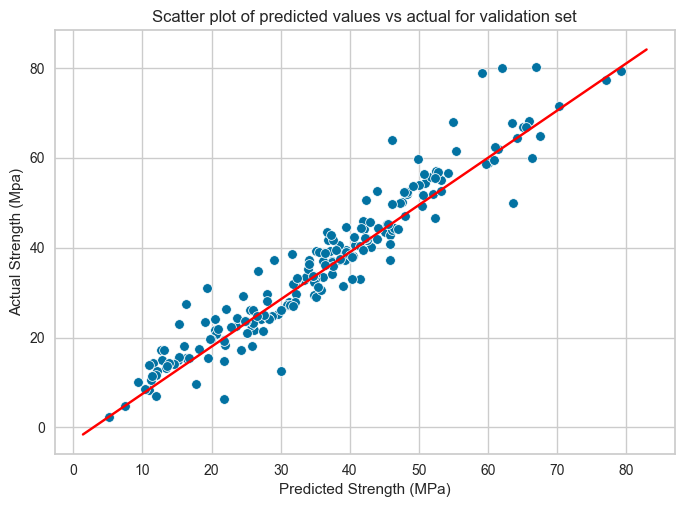

In [166]:
#TODO: predicted-actual plot
sns.scatterplot(x=bestmodel.predict(X_val),y=y_val)

plt.title("Scatter plot of predicted values vs actual for validation set")
plt.ylabel("Actual Strength (Mpa)")
plt.xlabel("Predicted Strength (MPa)")

plt.plot(plt.xlim(),plt.ylim(), color = 'red')

plt.show()

### 7.3 Residual plot (1 mark)
Using a scatterplot, show predicted strength on the x axis and the *difference* between actual and predicted strength on the y axis with data from the test set. This is an alternative way to see where errors are made.

We look for residuals being distributed equally around the zero horizontal line.

Add x-axis, y-axis labels including units, and a title.



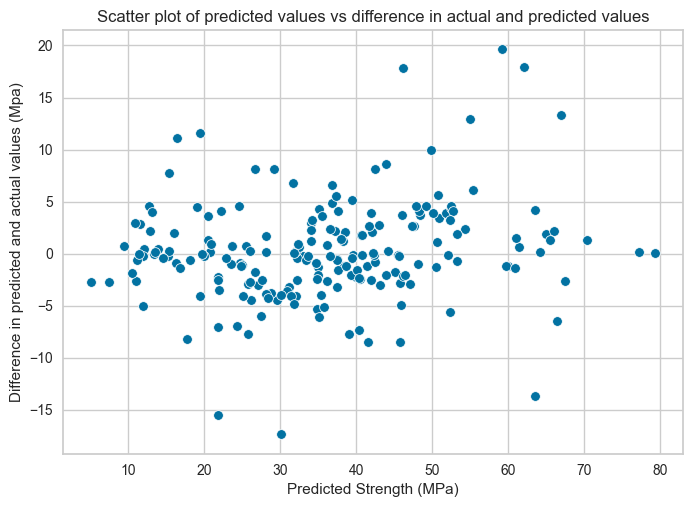

In [168]:
# TODO: Residual plot
sns.scatterplot(x=bestmodel.predict(X_val),y=(y_val-bestmodel.predict(X_val)))

plt.title("Scatter plot of predicted values vs difference in actual and predicted values")
plt.ylabel("Difference in predicted and actual values (Mpa)")
plt.xlabel("Predicted Strength (MPa)")

plt.show()

## 8. Conclusion (3 marks)

In conclusion, comment on the following items:
1. Did we find a model that outperforms the polynomial regression reported in the reference article? Explain.
2. Did we find a model that outperforms the neural network reported in the reference article? Explain.
3. What were our assumption about the dataset and train/test split? How do these assumptions affect your conclusions?

ANSWERS:
1. Yes - we found that a random forest model with a max depth of 20 and 400 n_estimators outperformed the polynomial regression model in the reference article.  We know this is a better model because of the lower root mean-square error value (4.80 for the forest model vs 8.82 for the polynomial) and a higher r-squared value (0.915 for the forest model vs 0.791 for the polynomial) for the validation set.
2. No - the random forest model performs worst with a higher root mean-square error value (4.80 for the forest model vs 4.32 for the polynomial) and a lower r-squared value (0.915 for the forest model vs 0.929 for the polynomial) for the validation set.
3. We made several assumptions about the dataset including:

    a. The data in the set is representative of the types of concrete we are interested in.  I noticed the distribution of the concrete strength was not a "perfect" bell curve which is what I would expect for large samples of most populations.  Perhaps there needs to be more data or at least a civil engineering explanation as to why it is skewed.  Not all data should be a bell curve but it would make sense for it to be from a non-civil engineering perspective.

    b. The data does not contain a significant amount of outliers that could skew the model
    
    c. The data is generalizable.  If the data quality is poor (random data or not enough) then any model made from it will be useless (garbage in, garbage out principle)

    d. We assume the data is accurate (no or minimal measurement errors when actually taking the samples)

    e. We assume the train/test split did not split the data into "distinct" sets of data that have different generalizations.  This could be the case if say the training data happened to be older than the testing data.  Put simply the training and testing data are randomly distributed


These assumptions affect the validity of our conclusions.  If any of these assumptions are found to be incorrect then our model is less useful or even useless depending on the severity of the assumption violated.  If one or any of these assumptiosn is false it also means that our conclusion about comparisions between models would not hold because our model would not be valid.  It would also heavily imply that the polynomial and neural net models are also not valid assuming they made the same assumptions.  There is a chance that there models are still valid if they used techniques not mentioned that could account or ignore the above assumptions, but that doesn't appear to be the case. 

## 9. Reflection (2 marks)



Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating while working on this assignment.

*ADD YOUR THOUGHTS HERE*

1. I liked seeing how hyper parameters were optimized for.  Previously in the course it was obvious that parameter selection was a defining factor in creating useful models so getting to execute that was useful.  I assume there are far better methods than just brute forcing multiple types of parameters which we covered in class but didn't nessisarily play out in this lab (creating a heatmap of hyper parameters to see which direction they trend it.  I assume there are more sophisticated ways of optimizing them as well which I'm excited to learn about).  To be honest I didn't dislike anything about this lab.
2. I found the distribution of concrete strength interesting becasuse it wasn't a perfect bell curve.  Typically I would think this to be the case but perhaps there is a logical reason (survivorship bias or something of that nature).  I also found the heat map for the feature correlation very interesting because this wasn't a technique I would have ever thought to try without doing this course because I typically focus heavily on the accuracy and less on what features are related to each other and how they impact the final model.  I didn't find anything particularily confusing or challenging while the found the lab generally motivating.  The only challenge I did have was with getting some of the functions to work properly but that is typical for all coding exercises.

# Appendix-A: Bonus - use grid search to find the best model parameters
### (5 potential bonus marks)

## A-0. Workflow overview

In [ ]:
#This didn't work for me because the boston dataset was depreciated and it is a dependency in mglearn.
import mglearn
mglearn.plots.plot_grid_search_overview()

## A-1. Hyperparameter tuning using grid search (2 marks)

The inital cross-validation above showed that both DecisionTree based models might have merit. Next, the hyperparameters are tuned using grid search.

### A-1.1 Grid search for RandomForestRegressor

Perform grid search using `GridSearchCV` for the `RandomForestRegressor(random_state=64)`.

Grid search to use 7-fold cross-validation, and `neg_root_mean_squared_error` as the scoring function.

Use the following hyperparameters and values:
- `'n_estimators': [100, 200, 400]`
- `'max_depth': [ 15, 17, 19, 21]`
- `'max_features': ['auto', 'log2', None]`


In [29]:
# TODO: Setup grid search for RandomForestRegressor(random_state=64)

from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth' : [15,17,19,21],
'n_estimators' : [100,200,400],
'max_features' : ['auto','log2',None] }


grid_search = GridSearchCV(RandomForestRegressor(random_state=64),param_grid,cv=7,scoring='neg_root_mean_squared_error')

In [30]:
# TODO: perform the grid search by calling fit()
grid_search.fit(X_train,y_train)

c:\Users\dimat\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\dimat\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\dimat\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_f

GridSearchCV(cv=7, estimator=RandomForestRegressor(random_state=64),
             param_grid={'max_depth': [15, 17, 19, 21],
                         'max_features': ['auto', 'log2', None],
                         'n_estimators': [100, 200, 400]},
             scoring='neg_root_mean_squared_error')

In [31]:
# TODO: Print the best parameters
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'max_depth': 19, 'max_features': 'log2', 'n_estimators': 400}


In [32]:
# TODO: Print the best score
print('Best score: ',{grid_search.best_score_})

Best score:  {-4.890123611074559}


### A-1.2 Grid search for gradient boosted tree

Perform grid search using `GridSearchCV` for the `GradientBoostingRegressor(random_state=79)`.

Grid search to use 7-fold cross-validation, and `neg_root_mean_squared_error` as the scoring function.

Use the following hyperparameters and values:
- `'n_estimators': [100, 200, 500]`
- `'max_depth': [1, 3, 5, 7]`
- `'learning_rate': [0.01, 0.1, 1.0]`

In [33]:
# TODO: Setup grid search for GradientBoostingRegressor(random_state=79)
param_grid_2 = {'max_depth' : [1,3,5,7],
'n_estimators' : [100,200,500],
'learning_rate' : [0.01,0.1,1.0] }

grid_search_2 = GridSearchCV(GradientBoostingRegressor(random_state=79),param_grid_2,cv=7,scoring='neg_root_mean_squared_error')

In [34]:
# TODO: perform the grid search by calling fit()
grid_search_2.fit(X_train,y_train)

GridSearchCV(cv=7, estimator=GradientBoostingRegressor(random_state=79),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [100, 200, 500]},
             scoring='neg_root_mean_squared_error')

In [35]:
# TODO: Print the best parameters
print(f'Best parameters: {grid_search_2.best_params_}')

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}


In [36]:
# TODO: Print the best score
print('Best score: ',{grid_search_2.best_score_})

Best score:  {-4.207707066815203}


### *Question A-1:* Which of the two models produces the best score? What is the best score?

The gradient boosting regressor model produces the best score which was -4.21.

## A-2. Retrain best model (1 mark)

Get the best estimator from the two grid searches above and retrain this model on all training data.

In [43]:
#TODO: retrain the best estimator

best_max_depth = grid_search_2.best_params_['max_depth']
best_n_estimators = grid_search_2.best_params_['n_estimators']
best_learning_rate = grid_search_2.best_params_['learning_rate']


bestmodel_2 = GradientBoostingRegressor(random_state=79,max_depth=best_max_depth, n_estimators=best_n_estimators,learning_rate=best_learning_rate)

## A-3. Model evaluation and conclusion (1 mark)

Repeat steps in Section 7 above for the best model.

Revisit your Question 4.

In [45]:
#TODO: train and test set scores of retrained best model
bestmodel_2.fit(X_train,y_train)

y_training_rmse = mean_squared_error(y_train,bestmodel_2.predict(X_train), squared=False)
y_val_rmse = mean_squared_error(y_val,bestmodel_2.predict(X_val), squared=False)

y_training_r2 = r2_score(y_train,bestmodel_2.predict(X_train))
y_val_r2 = r2_score(y_val,bestmodel_2.predict(X_val))

print("Training rmse: {:.2f}".format(y_training_rmse))
print("Validation rmse: {:.2f}".format(y_val_rmse))
print("Training r-squared: {:.3f}".format(y_training_r2))
print("Validation r-squared: {:.3f}".format(y_val_r2))

Training rmse: 2.07
Validation rmse: 4.51
Training r-squared: 0.985
Validation r-squared: 0.926


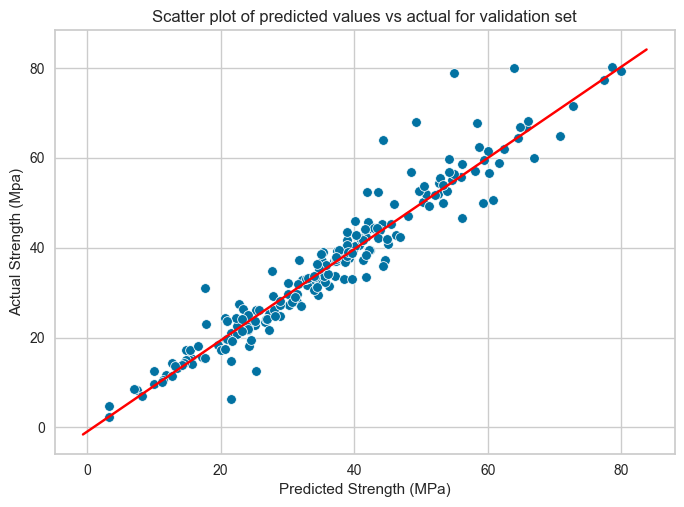

In [46]:
#TODO: predicted-actual plot
sns.scatterplot(x=bestmodel_2.predict(X_val),y=y_val)

plt.title("Scatter plot of predicted values vs actual for validation set")
plt.ylabel("Actual Strength (Mpa)")
plt.xlabel("Predicted Strength (MPa)")

plt.plot(plt.xlim(),plt.ylim(), color = 'red')

plt.show()

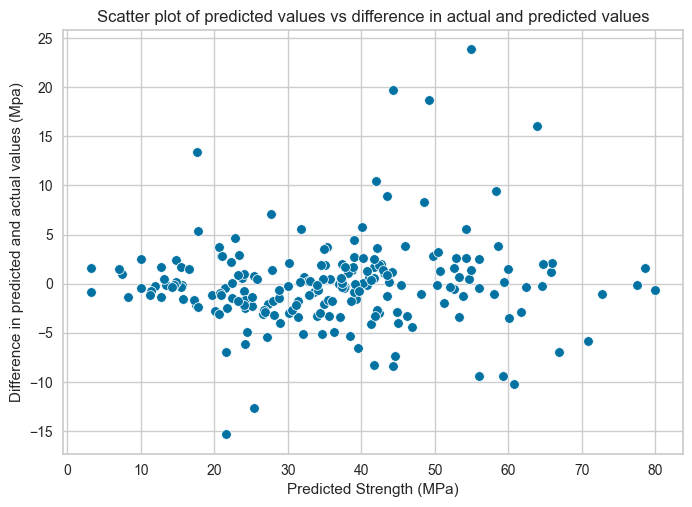

In [47]:
# TODO: Residual plot
# TODO: Residual plot
sns.scatterplot(x=bestmodel_2.predict(X_val),y=(y_val-bestmodel_2.predict(X_val)))

plt.title("Scatter plot of predicted values vs difference in actual and predicted values")
plt.ylabel("Difference in predicted and actual values (Mpa)")
plt.xlabel("Predicted Strength (MPa)")

plt.show()

### *Question A-4:* How does this test score compare to the polynomial regression and neural network reported in the article? Do we outperform the reported models? (1 mark)

The results are similar to the random forest.  The gradient boosting regressor outperforms the polynomial model(4.51 vs 8.82 for rmse and 0.926 vs 0.791 for r-squared), but not the neural net on the validation set (4.51 vs 4.32 fir rmse and 0.926 vs 0.929 for r-squared).  See below for comparision




| Model | RMSE | R-squared |
| --- | --- | --- |
| GradientBoostingRegressor (mine) - training | 2.07 | 0.985 |
| polynomial (article) - training | 3.96 | 0.890 |
| neural net (article) - training | 3.01 | 0.940 |
| GradientBoostingRegressor (mine) - validation | 4.51 | 0.926 |
| polynomial (article) - validation | 8.82 | 0.791 |
| neural net (article) - validation | 4.32 | 0.929 |